<a href="https://colab.research.google.com/github/ricardosaj/Bootcamp-Data-Science-Alura/blob/main/CadernoDoSuperDesafioModulo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BOOTCAMP DE DATA SCIENCE DA ALURA 2022**

***SUPER DESAFIO DO MÓDULO 01***

*Minha proposta é criar uma correlação entre o valor gasto/mês em cada estado com o número óbitos desses estados. Essa avaliação sendo feita para o ano de 2020*

*Retirei duas tabelas com essas informações do TABNET*

In [1]:
# Essa célula será para importar as bibliotecas que utilizaremos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Essa célula será para ler os arquivos .csv que temos e formatá-los
gastosporestadoem2020 = pd.read_csv("/content/gastoporestadoem2020.csv", encoding="ISO-8859-1", skiprows= 3, sep = ";" , skipfooter= 12, thousands=".", decimal=",")
obitosporestadoem2020 = pd.read_csv("/content/obitosem2020.csv", encoding="ISO-8859-1", skiprows= 3, sep = ";" , skipfooter= 12, thousands=".", decimal=",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


Retirando a coluna "Total" pois não será relevante para nossa avaliação.

In [3]:
gastosporestadoem2020 = gastosporestadoem2020.drop('Total', 1)
gastosporestadoem2020

,Unidade da Federação,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
0,11 Rondônia,9.222011e+06,7.493901e+06,8.148169e+06,7.353768e+06,7.739864e+06,9.308601e+06,1.195449e+07,1.188799e+07,1.032828e+07,8.068025e+06,9.486450e+06,9.018236e+06
1,12 Acre,3.331804e+06,3.417691e+06,3.076003e+06,2.286643e+06,2.896340e+06,3.045246e+06,3.915193e+06,3.640143e+06,3.391242e+06,4.044321e+06,3.276590e+06,3.696997e+06
2,13 Amazonas,1.606345e+07,1.493998e+07,1.510706e+07,1.354059e+07,1.970303e+07,2.113487e+07,1.976975e+07,1.806959e+07,1.785222e+07,1.641916e+07,1.990382e+07,1.779453e+07
3,14 Roraima,3.059824e+06,2.912520e+06,2.937346e+06,2.868821e+06,2.752228e+06,3.401864e+06,3.015488e+06,2.826486e+06,2.928044e+06,3.090314e+06,3.621031e+06,3.454461e+06
4,15 Pará,3.436599e+07,3.741758e+07,3.561033e+07,2.829245e+07,3.299881e+07,4.224078e+07,4.085190e+07,4.445166e+07,3.685889e+07,3.702501e+07,3.904098e+07,3.806801e+07
5,16 Amapá,2.333823e+06,2.310196e+06,1.842473e+06,1.705874e+06,2.065055e+06,2.009913e+06,3.253399e+06,2.946398e+06,2.416019e+06,2.203732e+06,2.218532e+06,2.566920e+06
6,17 Tocantins,8.098082e+06,7.024599e+06,7.210345e+06,6.391194e+06,6.708560e+06,7.439039e+06,9.161017e+06,8.393463e+06,8.736823e+06,7.771468e+06,8.878567e+06,7.072687e+06
7,21 Maranhão,3.032487e+07,3.001819e+07,2.930989e+07,2.525659e+07,3.138256e+07,3.492184e+07,3.549797e+07,3.227955e+07,3.016755e+07,3.340191e+07,3.212038e+07,3.108910e+07
8,22 Piauí,1.622947e+07,1.685133e+07,1.456825e+07,1.222439e+07,1.318221e+07,1.528207e+07,1.990857e+07,2.566354e+07,2.023078e+07,2.239090e+07,1.891510e+07,2.088397e+07
9,23 Ceará,5.063058e+07,5.072507e+07,4.700999e+07,4.504854e+07,4.644210e+07,5.499975e+07,5.602539e+07,6.172804e+07,5.670885e+07,5.917159e+07,5.698871e+07,5.097832e+07


In [4]:
obitosporestadoem2020 = obitosporestadoem2020.drop('Total', 1)
obitosporestadoem2020

,Unidade da Federação,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,11 Rondônia,684,633,749,701,877,1109,1030,1026,898,848,753,976
1,12 Acre,367,339,369,362,557,558,468,405,346,344,379,441
2,13 Amazonas,1612,1501,1511,3759,3590,1880,1659,1645,1677,1800,1695,2097
3,14 Roraima,259,199,254,218,403,597,360,250,211,219,281,265
4,15 Pará,3416,3281,3869,5471,8392,4740,4075,3711,3549,3549,3425,3795
5,16 Amapá,308,293,259,394,825,499,354,306,276,301,372,419
6,17 Tocantins,669,630,673,604,713,781,907,1087,954,798,711,728
7,21 Maranhão,2840,2850,3335,3761,6034,4369,3670,3497,3049,3030,2924,2999
8,22 Piauí,1707,1690,2007,1741,1935,2439,2495,2224,2014,2174,1872,2013
9,23 Ceará,4663,4873,5523,6236,10296,6660,5711,5269,5047,5145,4831,5208


In [5]:
# Alterei o nome de todas as colunas do DF de gastos para ficar no mesmo padrão do DF de obitos
gastosporestadoem2020 = gastosporestadoem2020.rename(columns={'Unidade da Federação': 'Unidade da Federação', '2020/Jan': 'Janeiro', '2020/Fev': 'Fevereiro', '2020/Mar': 'Março', '2020/Abr': 'Abril', '2020/Mai': 'Maio', '2020/Jun': 'Junho', '2020/Jul': 'Julho', '2020/Ago': 'Agosto', '2020/Set': 'Setembro', '2020/Out': 'Outubro', '2020/Nov': 'Novembro', '2020/Dez': 'Dezembro'})
gastosporestadoem2020.head()

,Unidade da Federação,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,11 Rondônia,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9308601.23,11954489.94,11887993.85,10328280.19,8068024.57,9486450.48,9018235.63
1,12 Acre,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31
2,13 Amazonas,16063450.73,14939977.20,15107056.74,13540590.64,19703025.18,21134874.24,19769752.76,18069587.18,17852221.73,16419160.70,19903821.77,17794528.56
3,14 Roraima,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94
4,15 Pará,34365985.58,37417579.86,35610330.34,28292446.48,32998806.72,42240776.53,40851896.60,44451659.55,36858888.56,37025006.25,39040983.98,38068009.09


In [6]:
# Esse dicionário foi criado para alterar todos os nomes dos estados do formato Número + ' ' + Nome para o formato Nome.
dicionario_estados = {'11 Rondônia': 'Rondônia', '12 Acre' : 'Acre', '13 Amazonas' : 'Amazonas', '14 Roraima' : 'Roraima',
         '15 Pará' : 'Pará', '16 Amapá': 'Amapá', '17 Tocantins' : 'Tocantins', '21 Maranhão': 'Maranhão',
         '22 Piauí': 'Piauí', '23 Ceará': 'Ceará', '24 Rio Grande do Norte' : 'Rio Grande do Norte', '25 Paraíba' : 'Paraíba',
         '26 Pernambuco' : 'Pernambuco', '27 Alagoas' : 'Alagoas', '28 Sergipe': 'Sergipe', '29 Bahia' : 'Bahia', 
         '31 Minas Gerais' : 'Minas Gerais', '32 Espírito Santo' : 'Espírito Santo', '33 Rio de Janeiro' : 'Rio de Janeiro', 
         '35 São Paulo' : 'São Paulo', '41 Paraná' : 'Paraná', '42 Santa Catarina' : 'Santa Catarina', 
         '43 Rio Grande do Sul' : 'Rio Grande do Sul', '50 Mato Grosso do Sul' : 'Mato Grosso do Sul', '51 Mato Grosso' : 'Mato Grosso', 
         '52 Goiás' : 'Goiás', '53 Distrito Federal' : 'Distrito Federal'}

gastosporestadoem2020['Unidade da Federação'] = gastosporestadoem2020['Unidade da Federação'].map(dicionario_estados)
obitosporestadoem2020['Unidade da Federação'] = obitosporestadoem2020['Unidade da Federação'].map(dicionario_estados)

In [7]:
# Transformar a coluna "Unidade da Federação" no index
obitosporestadoem2020.set_index('Unidade da Federação', inplace=True)
obitosporestadoem2020

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
Unidade da Federação,,,,,,,,,,,,
Rondônia,684,633,749,701,877,1109,1030,1026,898,848,753,976
Acre,367,339,369,362,557,558,468,405,346,344,379,441
Amazonas,1612,1501,1511,3759,3590,1880,1659,1645,1677,1800,1695,2097
Roraima,259,199,254,218,403,597,360,250,211,219,281,265
Pará,3416,3281,3869,5471,8392,4740,4075,3711,3549,3549,3425,3795
Amapá,308,293,259,394,825,499,354,306,276,301,372,419
Tocantins,669,630,673,604,713,781,907,1087,954,798,711,728
Maranhão,2840,2850,3335,3761,6034,4369,3670,3497,3049,3030,2924,2999
Piauí,1707,1690,2007,1741,1935,2439,2495,2224,2014,2174,1872,2013


In [8]:
# Transformar a coluna "Unidade da Federação" no index
gastosporestadoem2020.set_index('Unidade da Federação', inplace=True)
# dividi os valores por 1000000 (1 milhão) para que o valor fique 
gastosporestadoem2020 = gastosporestadoem2020 / 1000000
gastosporestadoem2020

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
Unidade da Federação,,,,,,,,,,,,
Rondônia,9.222011,7.493901,8.148169,7.353768,7.739864,9.308601,11.954490,11.887994,10.328280,8.068025,9.486450,9.018236
Acre,3.331804,3.417691,3.076003,2.286643,2.896340,3.045246,3.915193,3.640143,3.391242,4.044321,3.276590,3.696997
Amazonas,16.063451,14.939977,15.107057,13.540591,19.703025,21.134874,19.769753,18.069587,17.852222,16.419161,19.903822,17.794529
Roraima,3.059824,2.912520,2.937346,2.868821,2.752228,3.401864,3.015488,2.826486,2.928044,3.090314,3.621031,3.454461
Pará,34.365986,37.417580,35.610330,28.292446,32.998807,42.240777,40.851897,44.451660,36.858889,37.025006,39.040984,38.068009
Amapá,2.333823,2.310196,1.842473,1.705874,2.065055,2.009913,3.253399,2.946398,2.416019,2.203732,2.218532,2.566920
Tocantins,8.098081,7.024599,7.210345,6.391194,6.708560,7.439039,9.161017,8.393463,8.736823,7.771468,8.878567,7.072687
Maranhão,30.324869,30.018188,29.309892,25.256589,31.382564,34.921839,35.497966,32.279553,30.167548,33.401914,32.120376,31.089097
Piauí,16.229473,16.851334,14.568254,12.224394,13.182211,15.282066,19.908573,25.663537,20.230783,22.390897,18.915102,20.883973


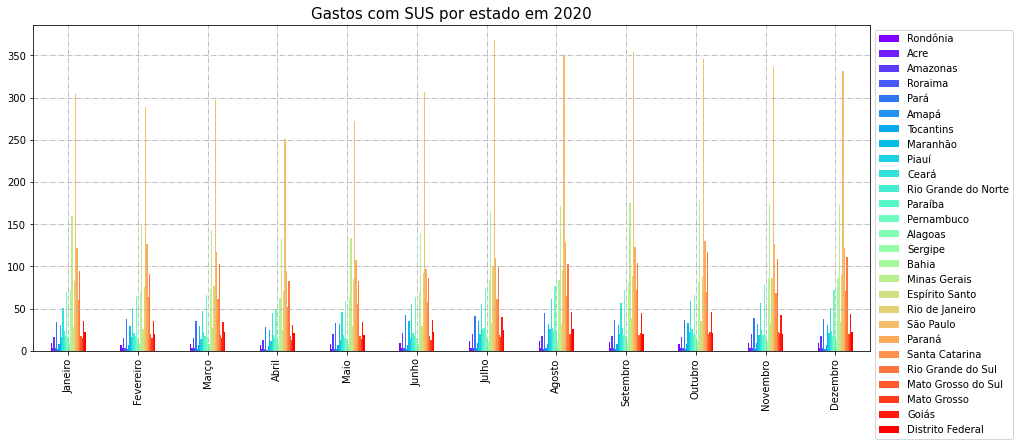

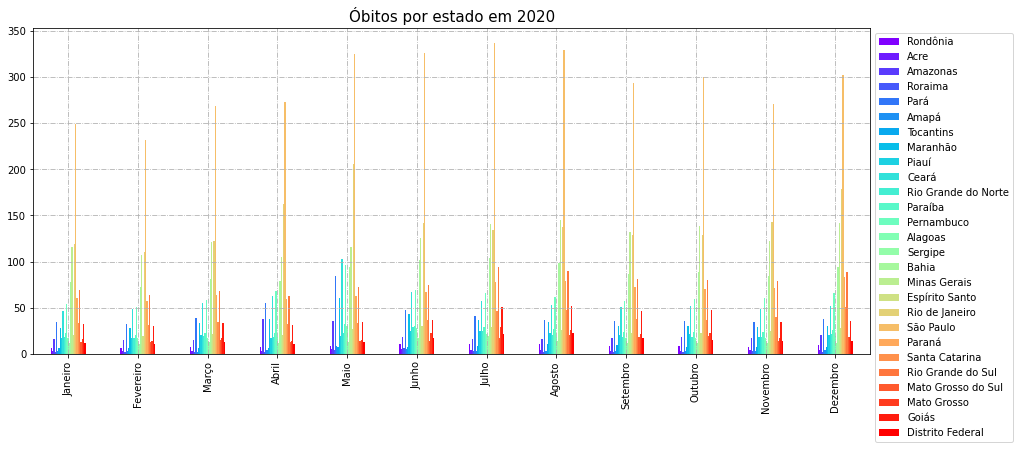

In [52]:
#plt.figure(figsize=(20,6))
plotdosobitosreduzido = obitosporestadoem2020/100
#plt.subplot(121)
gastosporestadoem2020.T.plot(kind='bar',figsize=(15,6), cmap='rainbow')
plt.title("Gastos com SUS por estado em 2020", fontsize=15)
plt.grid(b = True, axis = 'y', ls = '-.')
plt.grid(b = True, axis = 'x', ls = '-.')
plt.legend(bbox_to_anchor=(1, 1))
#gastosporestadoem2020.set_ylabel('Milhões de Reais', fontsize=15)
#gastosporestadoem2020.set_xlabel('Data da despesa', fontsize=15)
#plt.subplot(122)

plotdosobitosreduzido.T.plot(kind='bar',figsize=(15,6), cmap='rainbow')
plt.title("Óbitos por estado em 2020", fontsize=15)
plt.grid(b = True, axis = 'y', ls = '-.')
plt.grid(b = True, axis = 'x', ls = '-.')
plt.legend(bbox_to_anchor=(1, 1))
#plotdosobitosreduzido.set_ylabel('Mortos', fontsize=15)
#plotdosobitosreduzido.set_xlabel('Data do óbito', fontsize=15)

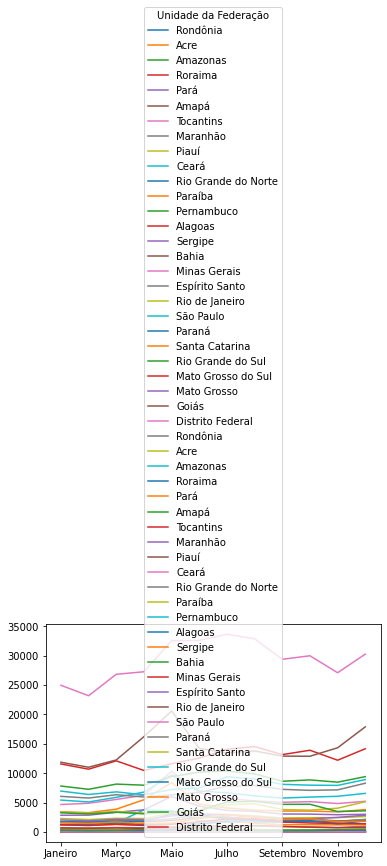

In [10]:
# Tentativa de plotar os 2 gráficos na mesma figura
ax = gastosporestadoem2020.T.plot()
obitosporestadoem2020.T.plot(ax=ax)